# Email Spam Filtering

**Using NLP Remove Stopwords ,Special characters and Special Symbols**

**Filtering the spam emails**

**Model Used : Logistic Regression**


In [50]:
import pandas as pd
import matplotlib.pyplot as plt
import dash
import dash_core_components as dcc
import dash_html_components as html
import plotly.graph_objs as go
import numpy as np
from dash.dependencies import Input, Output, State
import base64
spam_email = pd.read_csv('emails.csv')

# Description

**This Dataset has 5728 rows and 2 columns**

**Spam column has a values of '0' and '1'** 

**spam column with value '1' is SPAM Email and '0' is NOT SPAM Email**

In [51]:
print(spam_email.shape)
spam_email.head()


(5728, 2)


,text,spam
0,Subject: naturally irresistible your corporate...,1
1,Subject: the stock trading gunslinger fanny i...,1
2,Subject: unbelievable new homes made easy im ...,1
3,Subject: 4 color printing special request add...,1
4,"Subject: do not have money , get software cds ...",1


## EDA


In [52]:
#remving Duplicate rows from the dataset
spam_email.drop_duplicates(inplace = True)

print("Spam Email Shape After removing Duplicate rows")
print(spam_email.shape)
print("")
print("")
print("")
print("Count of spam and non-spam values ----------- 0 is SPAM and 1------------- is NOT-SPAM")
print("")
print(pd.value_counts(spam_email['spam']))
print("")
print("")
print("")
print("The null values in this Dataset columns")
pd.DataFrame(spam_email.isnull().sum())


Spam Email Shape After removing Duplicate rows
(5695, 2)



Count of spam and non-spam values ----------- 0 is SPAM and 1------------- is NOT-SPAM

0    4327
1    1368
Name: spam, dtype: int64



The null values in this Dataset columns


,0
text,0
spam,0


In [53]:
app = dash.Dash()
colors={
    'text':'#ff0000',
    'paper':'#D3D3D3',
    'plot':'#ABABAB'
}

In [54]:
Spam=pd.value_counts(spam_email['spam'] ==1, sort= True)
Ham=pd.value_counts(spam_email['spam'] ==0, sort= True)
image_filename1 = 'spam.png'
encoded_image_spam = base64.b64encode(open(image_filename1, 'rb').read())
image_filename2 = 'ham.png'
encoded_image_ham = base64.b64encode(open(image_filename2, 'rb').read())


FileNotFoundError: [Errno 2] No such file or directory: 'spam.png'

In [55]:
image_filename1

'spam.png'

In [57]:
if __name__ == '__main__':
    app.run_server(port = 4050)

 * Serving Flask app "__main__" (lazy loading)
 * Environment: production
   Use a production WSGI server instead.
 * Debug mode: off


 * Running on http://127.0.0.1:4050/ (Press CTRL+C to quit)


# Plotting Spam and Non-spam mails
**76% of the dataset has Not-Spam and rest is Spam**

**wordcloud to understand which are the most frequent words,add the words to stopwords which are unnecessary**

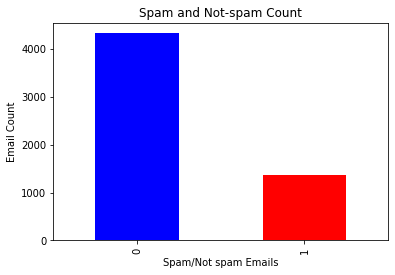

In [58]:
count_spam=pd.value_counts(spam_email['spam'], sort= True)
count_spam.plot(kind= 'bar', color= ["blue", "red"])
plt.title('Spam and Not-spam Count')
plt.xlabel('Spam/Not spam Emails')
plt.ylabel('Email Count')
plt.show()

In [9]:
email_ham  = spam_email[spam_email['spam'] == 0].copy()
email_spam = spam_email[spam_email['spam'] == 1].copy()

In [10]:

def show_wordcloud(spam_or_ham, title):
    text = ' '.join(spam_or_ham['text'].astype(str).tolist())
    stopwords = set(wordcloud.STOPWORDS)
    #stopwords.update(["subject","hou","ect","let","know","cc","re","free","one","now","may","want","well","will","us","new"])
    
    fig_wordcloud = wordcloud.WordCloud(stopwords=stopwords,background_color='lightgrey',
                    colormap='viridis', width=800, height=600).generate(text)
    
    plt.figure(figsize=(10,7), frameon=True)
    plt.imshow(fig_wordcloud)  
    plt.axis('off')
    plt.title(title, fontsize=20 )
    plt.show()

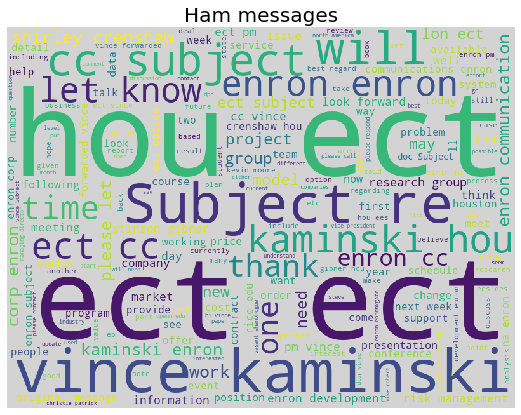

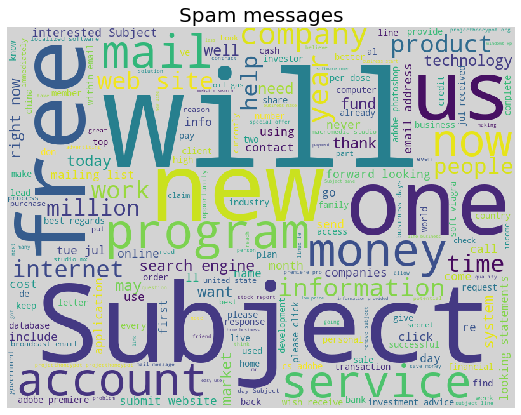

In [11]:
import wordcloud
show_wordcloud(email_ham, "Ham messages")
show_wordcloud(email_spam, "Spam messages")

# NLP

**tokenizing the data to get the indiviadual words and remove the following**

**remove Stopwords,digits,special characters and symbols**

In [12]:
import nltk,re
from nltk.corpus import stopwords

In [13]:
#tokenizing the text
spam_email['text']= spam_email['text'].str.lower()
spam_email['tokens'] = spam_email['text'].map(lambda text:  nltk.tokenize.word_tokenize(text)) 
spam_email.head()

,text,spam,tokens
0,subject: naturally irresistible your corporate...,1,"[subject, :, naturally, irresistible, your, co..."
1,subject: the stock trading gunslinger fanny i...,1,"[subject, :, the, stock, trading, gunslinger, ..."
2,subject: unbelievable new homes made easy im ...,1,"[subject, :, unbelievable, new, homes, made, e..."
3,subject: 4 color printing special request add...,1,"[subject, :, 4, color, printing, special, requ..."
4,"subject: do not have money , get software cds ...",1,"[subject, :, do, not, have, money, ,, get, sof..."


In [14]:
#removing stop words and Subject
stop_words = set(nltk.corpus.stopwords.words('english'))
stop_words.update(["subject","hou","ect","let","know","cc","re","free","one","now","may","want","well","will","us","new"])

spam_email['filtered_text'] = spam_email['tokens'].map(lambda tokens: [w for w in tokens if not w in stop_words]) 
#spam_email['filtered_text']= spam_email['filtered_text'].str.lower()

In [15]:
#joining the filtered_text
spam_email['filtered_text'] = spam_email['filtered_text'].map(lambda text: ' '.join(text))
#remove digits from the word but not digits embedded with the word
spam_email['filtered_text'] = spam_email['filtered_text'].map(lambda text: re.sub("^\d+\s|\s\d+\s|\s\d+$", " ", text))
#replace special symbols with space
spam_email['filtered_text'] = spam_email['filtered_text'].map(lambda text: re.sub(r"[^-/().&'@?<=>*+-./!:;{|}[\\]` \w]|_", "", text))
#removing special characters from each mail 
spam_email['filtered_text'] = spam_email['filtered_text'].map(lambda text: re.sub('[^A-Za-z0-9]+', ' ', text))

In [16]:
spam_email.head()

,text,spam,tokens,filtered_text
0,subject: naturally irresistible your corporate...,1,"[subject, :, naturally, irresistible, your, co...",naturally irresistible corporate identity lt ...
1,subject: the stock trading gunslinger fanny i...,1,"[subject, :, the, stock, trading, gunslinger, ...",stock trading gunslinger fanny merrill muzo c...
2,subject: unbelievable new homes made easy im ...,1,"[subject, :, unbelievable, new, homes, made, e...",unbelievable homes made easy im wanting show ...
3,subject: 4 color printing special request add...,1,"[subject, :, 4, color, printing, special, requ...",color printing special request additional inf...
4,"subject: do not have money , get software cds ...",1,"[subject, :, do, not, have, money, ,, get, sof...",money get software cds software compatibility...


In [17]:
#lemmetization 
wnl = nltk.WordNetLemmatizer()
#lemmetizing the text----> used to get the root words
spam_email['filtered_text'] = spam_email['filtered_text'].map(lambda text: wnl.lemmatize(text))

w_tokenizer = nltk.tokenize.WhitespaceTokenizer()
lemmatizer = nltk.stem.WordNetLemmatizer()

def lemmatize_text(text):
    return [lemmatizer.lemmatize(w) for w in w_tokenizer.tokenize(text)]

In [18]:
print(spam_email.filtered_text.head())

0     naturally irresistible corporate identity lt ...
1     stock trading gunslinger fanny merrill muzo c...
2     unbelievable homes made easy im wanting show ...
3     color printing special request additional inf...
4     money get software cds software compatibility...
Name: filtered_text, dtype: object


In [19]:
from sklearn.feature_extraction.text import CountVectorizer
count_vectorizer = CountVectorizer()
counts = count_vectorizer.fit_transform(spam_email['filtered_text'].values)
print(counts.shape)

(5695, 34116)


In [20]:
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import CountVectorizer
tfidf_transformer = TfidfTransformer(smooth_idf=True,use_idf=True).fit(counts)
data_tfidf = tfidf_transformer.transform(counts)
print(data_tfidf.shape)




#from sklearn.feature_extraction.text import TfidfVectorizer
#tfidf_vectorizer=TfidfVectorizer(ngram_range=(2,2),use_idf=True)
# just send in all your docs here
#fitted_vectorizer=tfidf_vectorizer.fit(spam_email['filtered_text'])
#tfidf_vectorizer_vectors=fitted_vectorizer.transform(spam_email['filtered_text'])
#print(tfidf_vectorizer_vectors.shape)

(5695, 34116)


In [21]:
feature_names = count_vectorizer.get_feature_names()
 
#get tfidf vector for first document
first_document_vector=data_tfidf[5643]
 
#print the scores
df = pd.DataFrame(first_document_vector.T.todense(), index=feature_names, columns=["tfidf"])
df.sort_values(by=["tfidf"],ascending=False).head()

,tfidf
oooo,0.569178
cantekin,0.474344
dincerler,0.250668
part,0.211479
austin,0.192390


###  Model used
*Logistic Regression*  
*Input : tfidf weights and spam_features*  
*calculating accuracy and confusion_matrix used for getting the how accurately our prediction goes*  
**Train-size : Test-size  = 60 : 40**

*Supervised Learning Algorithm which uses calculated logits to predict the target class*


In [28]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

In [29]:

#splitting the data for training and testing purposes
X_train, X_test, y_train, y_test = train_test_split(data_tfidf , spam_email['spam'], test_size=0.4, random_state=21)
#l1 regularisation is used to shrink the less important coefficient to zero
model = LogisticRegression(solver='liblinear', penalty='l1')
#fit the model
model.fit(X_train, y_train)
#predict on test set
predicted = model.predict(X_test)


# Evaluate your model
*precison -->correctly classified to the total number of predicted positive samples*
*recall   -->correctly classified to the total number of positive samples*

*f1-score -->computes H.M on precision and recall ,used to evaluate between two models*  
*precision = tp / tp+fn*
*recall= tp/tp+fp*
*f1-score = 2 x precision x recall /(precison +recall )*

*https://en.wikipedia.org/wiki/Precision_and_recall*   
*Based on Precision and recall,can evaluate the model,even if the accuracy is high sometimes it shows wrong*
*As higher the precision and accuracy ,the model is good*

In [30]:
#print the confusion matrix 
matrix = confusion_matrix(y_test, predicted)
print('-------confusion matrix------')
print(matrix)
print("")
print('--------------------classification report-------------------')
report = classification_report(y_test, predicted)
print(report)

-------confusion matrix------
[[1696   33]
 [  46  503]]

--------------------classification report-------------------
              precision    recall  f1-score   support

           0       0.97      0.98      0.98      1729
           1       0.94      0.92      0.93       549

    accuracy                           0.97      2278
   macro avg       0.96      0.95      0.95      2278
weighted avg       0.97      0.97      0.97      2278



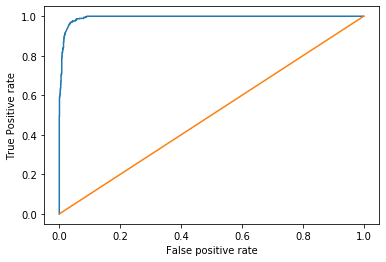

In [31]:
#roc_auc curve for measuring the performance
from sklearn.metrics import roc_curve, auc, roc_auc_score
#model.predict_proba(X_test)
log_roc_auc = roc_auc_score(y_test,model.predict(X_test))
fpr,tpr,threshold = roc_curve(y_test,model.predict_proba(X_test)[:,1])

plt.figure()
plt.plot(fpr,tpr,label="Log")
plt.plot([0,1],[0,1],"")
plt.xlabel("False positive rate")
plt.ylabel("True Positive rate")
plt.xlim([-0.05,1.05])
plt.ylim([-0.05,1.05])
plt.show()

In [32]:
from sklearn.metrics import r2_score
r2_score(y_test, predicted)

0.8104108526886784

In [33]:
#RMSE
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_test,predicted)
import numpy as np
mse = np.sqrt(mse)

mse

0.18622444377464176

In [49]:
#Misclassified mails in the list
import numpy as np

#y_test = np.asarray(y_test)
misclassified = np.where(y_test != model.predict(X_test))
print(misclassified)


feature_names = count_vectorizer.get_feature_names()
 
#get tfidf vector for first document
first_document_vector=X_test[201]
df = pd.DataFrame(first_document_vector.T.todense(), index=feature_names, columns=["tfidf"])
df.sort_values(by=["tfidf"],ascending=False).head(20)

(array([  48,  136,  201,  234,  258,  265,  272,  299,  411,  419,  485,
        489,  535,  590,  602,  605,  617,  627,  669,  705,  716,  723,
        738,  744,  746,  778,  784,  786,  787,  792,  817,  894,  902,
        903,  908,  911,  937,  957,  970,  981,  989, 1018, 1087, 1190,
       1259, 1295, 1299, 1320, 1336, 1350, 1367, 1373, 1538, 1550, 1614,
       1626, 1630, 1640, 1660, 1663, 1713, 1771, 1825, 1875, 1928, 1987,
       1990, 2022, 2066, 2075, 2108, 2121, 2163, 2166, 2181, 2234, 2240,
       2243, 2250]),)


,tfidf
reactionsnet,0.459854
viewstory,0.457970
asp,0.413734
conferences,0.322395
id,0.244745
www,0.218915
http,0.197808
com,0.147854
rendez,0.114493
reinsurance,0.104619
